In [198]:
#Importing necessary Libraries

import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [152]:
# Setting the path
path = "C:/dev/Tourwriter/Data/Sales_Data"


In [153]:
# Connecting all files into object

all_files = glob.glob(os.path.join(path, "Sales_*.csv"))

In [154]:
#Reading all the files
all_csv = (pd.read_csv(f, sep=',') for f in all_files)

In [155]:
#Merging all the files
df_merged = pd.concat(all_csv, ignore_index=True)


In [156]:
#Copying the file into dataframe called df
df = df_merged.copy()

In [157]:
#Checking the shape of the file
df.shape

(186850, 6)

In [158]:
#Checking the missing values
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

545 null values are there in all variables. Dropping the same from our dataset

In [159]:
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
nan_df.shape

(545, 6)

In [161]:
# Dropping the null values
df = df.dropna(axis = 0, how ='all') 
df.shape

(186305, 6)

In [162]:
# Renaming the column names

df.rename(columns = {'Order ID':'Order_ID', 'Quantity Ordered': 'Qty_ordered', 'Price Each' : 'Price', 'Order Date' : 'Ordered_Date', 'Purchase Address' : 'Address'}, inplace = True) 


In [163]:
#Converting the order ID and Price int float

df['Order_ID'] = pd.to_numeric(df['Order_ID'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [164]:
df.dtypes

Order_ID        float64
Product          object
Qty_ordered      object
Price           float64
Ordered_Date     object
Address          object
dtype: object

In [165]:
df = df.dropna(axis=0, subset=['Order_ID'])

In [166]:
# Convert the ordered date into datettime type
df['Ordered_Date'] = pd.to_datetime(df['Ordered_Date'])


In [167]:
# Convert ordered quanity into int
df['Qty_ordered'] = df['Qty_ordered'].astype(int)

In [168]:
# Extracting the month from date column
df['Month'] = pd.to_datetime(df['Ordered_Date']).dt.month

In [169]:
# Splitting the city from address and create a new column called city

def get_city(address):
    return address.split(",")[1].strip(" ")

df['City'] = df['Address'].apply(get_city)

In [172]:
# Extracting the state from Address and combine into city

def get_state(address):
    return address.split(",")[2].split(" ")[1]
    
    
df['State'] = df['Address'].apply(get_state)
df['City'] = df['City'] + ", " + df['State']

In [183]:
df

,Order_ID,Product,Qty_ordered,Price,Ordered_Date,Address,Month,City,State
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,"Dallas, TX",TX
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,"Boston, MA",MA
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA",CA
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA",CA
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles, CA",CA
...,...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,"Los Angeles, CA",CA
186846,259354.0,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,"San Francisco, CA",CA
186847,259355.0,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,"San Francisco, CA",CA
186848,259356.0,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,"San Francisco, CA",CA


# Data Analysis

### What was the best month for sales? How much was earned that month?

In [189]:
df['Total_price'] = df['Qty_ordered'] * df['Price']

In [196]:
sales = df.groupby('Month')['Total_price'].sum()

Text(0, 0.5, 'Sales in USD')

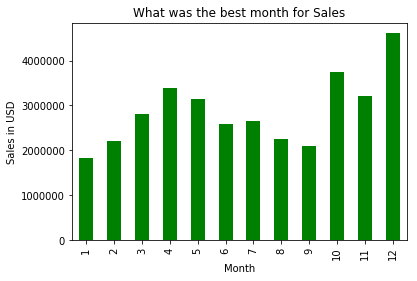

In [199]:
sales.plot(kind = 'bar', color = 'green', align = 'center')
plt.title("What was the best month for Sales")
plt.xlabel("Month")
plt.ylabel("Sales in USD")

## What city sold the most product?

In [202]:
city = df.groupby('City')['Total_price'].sum()
city

City
Atlanta, GA          2.795499e+06
Austin, TX           1.819582e+06
Boston, MA           3.661642e+06
Dallas, TX           2.767975e+06
Los Angeles, CA      5.452571e+06
New York City, NY    4.664317e+06
Portland, ME         4.497583e+05
Portland, OR         1.870732e+06
San Francisco, CA    8.262204e+06
Seattle, WA          2.747755e+06
Name: Total_price, dtype: float64

Text(0, 0.5, 'Sales in USD')

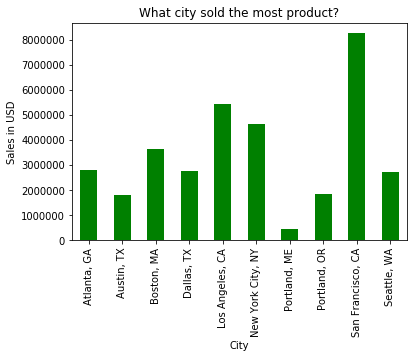

In [203]:
city.plot(kind = 'bar', color = 'green', align = 'center')
plt.title("What city sold the most product?")
plt.xlabel("City")
plt.ylabel("Sales in USD")

## What time should we display advertisements to maximize likelihood of customer's buying product?

In [211]:
# Extracting the hour and minute
df['Hour'] = pd.to_datetime(df['Ordered_Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Ordered_Date']).dt.minute
df['Count'] = 1

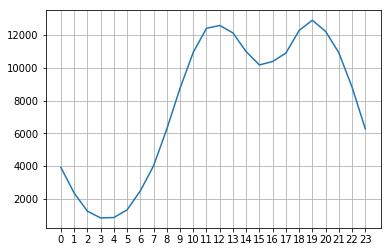

In [220]:
keys = [pair for pair, df in df.groupby(['Hour'])]

plt.plot(keys, df.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

## What products are most often sold together?

In [254]:
# In order to find the product sold together, we need to find the duplicates in the order id, then combined the product and count it
df1 = df[df['Order_ID'].duplicated(keep = False)]
df1['group'] = df1.groupby('Order_ID')['Product'].transform(lambda x: ','.join(x))
df2 = df1[['Order_ID', 'group']].drop_duplicates()

In [240]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## What product sold the most? Why do you think it sold the most?

In [252]:
product = df.groupby('Product')['Qty_ordered'].sum()
product

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Qty_ordered, dtype: int32

Text(0, 0.5, 'Number of Quantities')

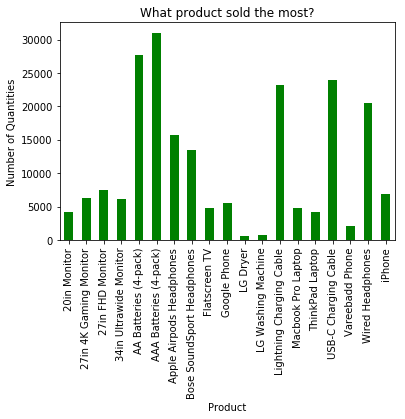

In [253]:
product.plot(kind = 'bar', color = 'green', align = 'center')
plt.title("What product sold the most?")
plt.xlabel("Product")
plt.ylabel("Number of Quantities")

In [255]:
prices = df.groupby('Product').mean()['Price']

In [256]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price, dtype: float64